<img src="img/logo_wiwi_en_.png" width="30%" align="left">

<img src="img/decision_analytics_logo.png" width="17%" align="right">



<br><br><br><br><br><br><br><br>



# Combining OR and Data Science

**Summer Term 2024**


# Homework 1
29.05.2024 - 14.06.2024


<br>

<br>
<br>

**J-Prof. Dr. Michael Römer, Mohsen Nafar**

**Decision Analytics Group  | Bielefeld University**

This homework is part of the course Combining OR and Data Science. Please upload your solution in moodle. You can either hand in a Jupyter notebook containing your code and documentation of what you did (in Markdown Cells), or hand in a Jupyter notebook with your code and a pdf with your documentation.

If you have any technical issues or if something is hard to understand, please send an email to [Mohsen Nafar](mailto:mohsen.nafar@uni-bielefeld.de) or [Michael Römer](mailto:michael.roemer@uni-bielefeld.de).

The homework is due on Friday, June 14, 2024. If you have any issues with that date, e.g. due to exams or other projects or homeworks, please let us know via email.

**Important notice: You are not allowed to work in groups.**

## Case Study: Selling Mango Lassi


<img src="img/lassi.jpg" width="20%" align="right">

Each Sunday in summer, you sell your cold and famous mango Lassi close to a tourist spot in Bielefeld.

You sell the Lassi at 3.50 € per glass, and on an average Sunday, you expect to sell about 1000 glasses.

The main ingredients of your Lassi are mangos and yogurt. We assume that per glass, you need half a mango as well as yoghurt and other ingredients. You buy the mangos in boxes of five fruits each, where each box costs you 10 €. You have to pre-order the mangos the day before. Per glass, the other ingredients cost you 0.50 €. We assume that you can buy more than enough of the other ingredients since you can store them for more than one week (which is not true for the mangos).

We assume that you prepare a certain amount of Lassi on Sunday morning, and you continue to prepare during short breaks, such that you can exactly match the demand.

In addition to the variable costs induced by the ingredients, you have to pay a fee for the sales spot to the city; that fee amounts to 500 € per Sunday.




The big issue you have to face is that you don't know how many glasses of Lassi you will be able to sell this Sunday, and in contrast to the other ingredients which can be stored until the next week, mangos cannot be used then since they will be too ripe. However, you have a friend who owns an ice cream cafe; in case you have mangos left on Sunday evening, you can sell her up to 30 mangos at a price of 1 € each.




## 1. Historical Demand Data

Fortunately, you have historical demand data collected throughout the recent years. You assume that the data is actual demand data (that is, this data does not representing historical sales that would not include non-fulfilled demand). The data is stored in the file `data.txt`.


**Task 1a)**: Read in the dataset and check if it satisfies the i.i.d. assumptions.

**Ans** By analyzing the data and viewing plot it shows that it does not follow the normal distribution and doesn't meet i.i.d assumptions. we can plot to cofirm i.i.d assumptions and also make some statistical tests which also shows that this data doesn't meet i.i.d assumptions.

In [ ]:
import pandas as pd

df = pd.read_csv('data.txt', header = None, names=["demand"])
df.head()
df.describe()

,demand
count,500.000000
mean,1000.000001
std,400.400601
min,346.389600
25%,722.331950
50%,931.214500
75%,1169.684825
max,3187.175100


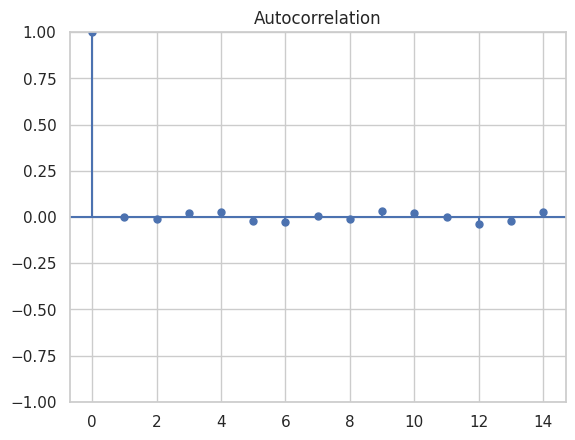

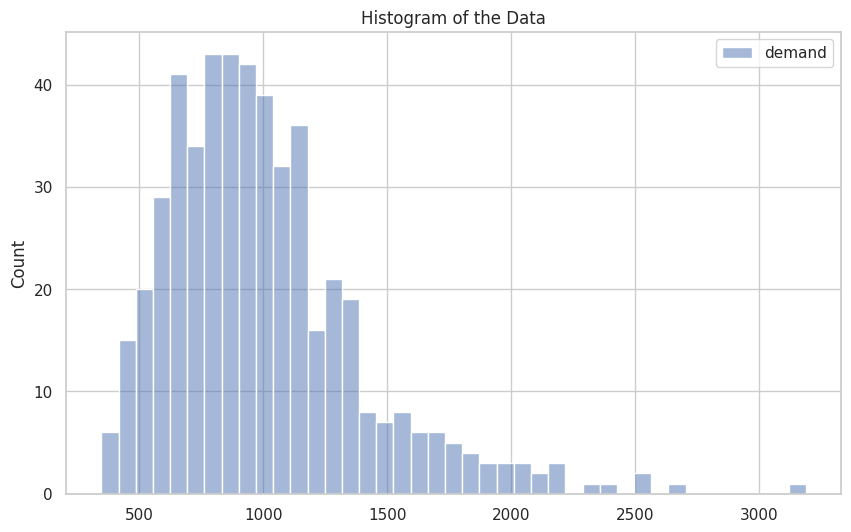

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
from statsmodels.graphics.tsaplots import plot_acf

## Visualiying histogram of the data and auto correlation to see if data meets i.i.d assimputions

#Autocorrelation plots show the correlation
plot_acf(df,lags=14, alpha=None);

# Plotting the histogram
plt.figure(figsize=(10, 6))
sns.histplot(df, bins=41)
plt.title('Histogram of the Data')
plt.show()

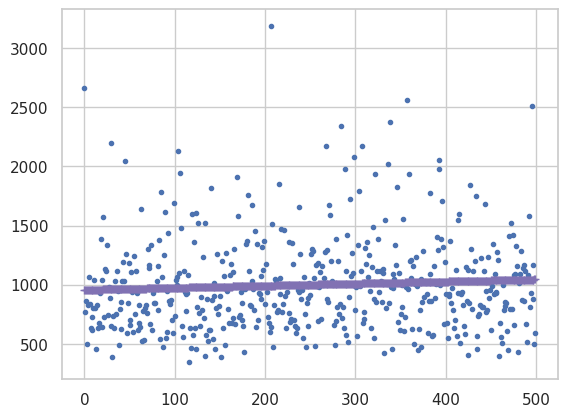

In [ ]:
import numpy as np


data = np.loadtxt('data.txt') #load in data

# We can check i.i.d assumptions by plotting the observations over time(from slides)

length = range(len(data))
plt.scatter(length, data, s=9);
z = np.polyfit(length, data, deg=1)
p = np.poly1d(z)
plt.plot(length, p(length),'m+') ;

**Task 1b)**: Plot the histogram of the data. Use the histogram to find a set of candidate distributions, and fit at least three probability distributions; pick the one with the best fit. You can assume that demand follows a continuous distribution, you can later round the values to integers.

As we know that (by Histogram) data doesn't follow the normal distribution. We can plot different distributions and fit the best matching one. We can try distribution of similar shapes as of data.


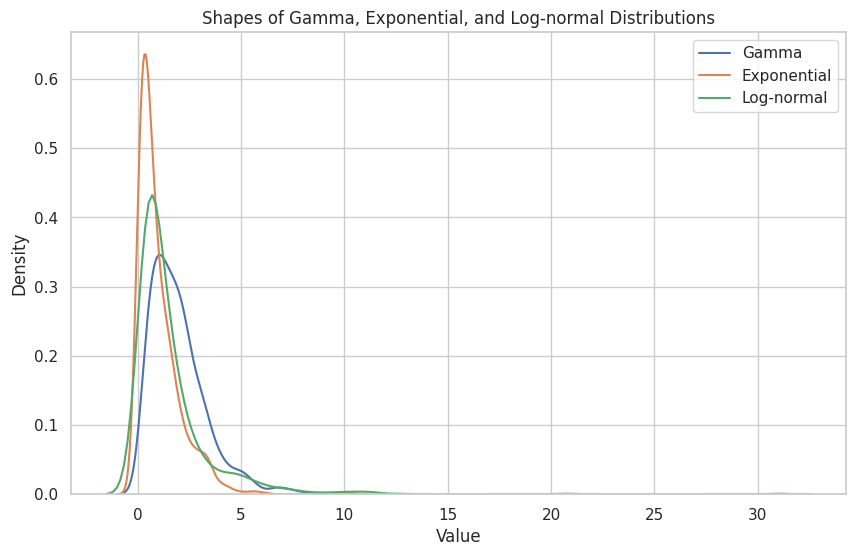

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

# Generate data for each distribution
np.random.seed(0)

# Gamma distribution
gamma_data = np.random.gamma(shape=2, scale=1, size=1000)

# Exponential distribution
exponential_data = np.random.exponential(scale=1, size=1000)

# Log-normal distribution
lognorm_data = np.random.lognormal(mean=0, sigma=1, size=1000)

# Plot the distributions
plt.figure(figsize=(10, 6))

sns.kdeplot(gamma_data, label='Gamma')
sns.kdeplot(exponential_data, label='Exponential')
sns.kdeplot(lognorm_data, label='Log-normal')

plt.title('Shapes of Gamma, Exponential, and Log-normal Distributions')
plt.xlabel('Value')
plt.ylabel('Density')
plt.legend()

plt.show()


/usr/local/lib/python3.10/dist-packages/scipy/stats/_continuous_distns.py:719: RuntimeWarning: invalid value encountered in sqrt
  sk = 2*(b-a)*np.sqrt(a + b + 1) / (a + b + 2) / np.sqrt(a*b)
/usr/local/lib/python3.10/dist-packages/scipy/optimize/_minpack_py.py:177: RuntimeWarning: The iteration is not making good progress, as measured by the 
  improvement from the last ten iterations.
  warnings.warn(msg, RuntimeWarning)


(0.0, 1000.0000005999999)
(0, 1077.0329620264397)
(0.37485961569908566, 0, 930.9031291471151)
(2.883262109645296, 7.144021431846917, 0, 3453.056540725741)


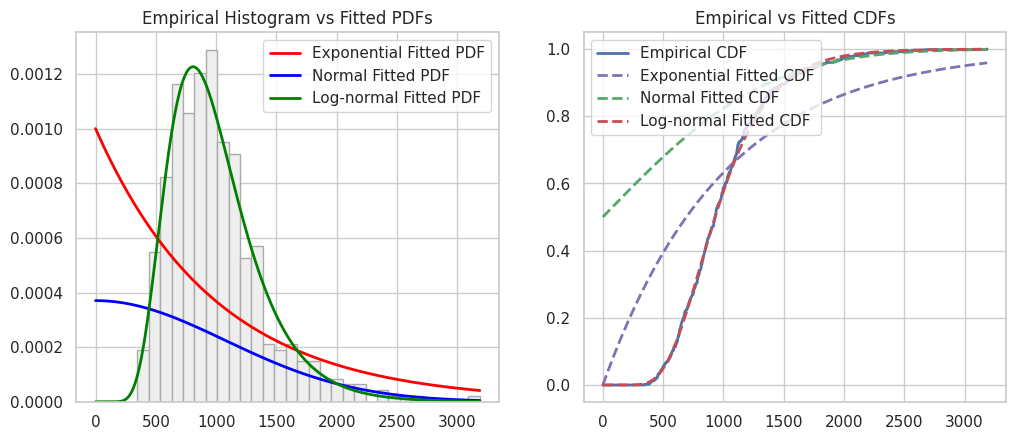

Best fit: Log-normal with p-value 0.8380944066281704


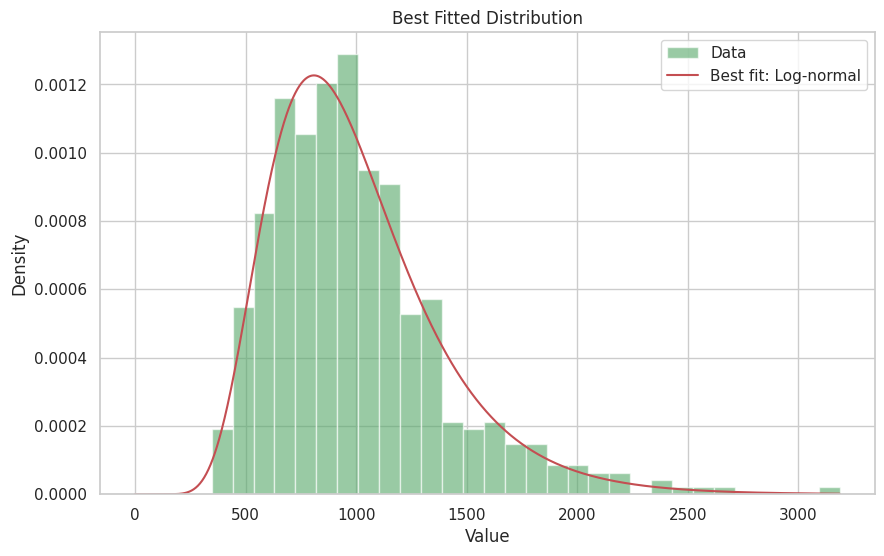

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import expon, norm, lognorm, beta
from statsmodels.distributions.empirical_distribution import ECDF

# Load the data
data = np.loadtxt('/content/data.txt')

# Fit the data to three distributions: Exponential, Normal, Log-normal, Beta
params1 = expon.fit(data, floc=0)  # Exponential
params2 = norm.fit(data, floc=0)   # Normal
params3 = lognorm.fit(data, floc=0) # Log-normal
params4 = beta.fit(data, floc=0)   # Beta

print(params1)
print(params2)
print(params3)
print(params4)

dist1 = expon(*params1)
dist2 = norm(*params2)
dist3 = lognorm(*params3)
dist4 = beta(*params4)

# Plot the fitted distributions
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12, 4.8))
xx = np.linspace(0, np.max(data) + 0.1, 1000)

# Plotting Exponential distribution
ax1.plot(xx, dist1.pdf(xx), linewidth=2, color="red", label="Exponential Fitted PDF")
# Plotting Normal distribution
ax1.plot(xx, dist2.pdf(xx), linewidth=2, color="blue", label="Normal Fitted PDF")
# Plotting Log-normal distribution
ax1.plot(xx, dist3.pdf(xx), linewidth=2, color="green", label="Log-normal Fitted PDF")

ax1.set_title('Empirical Histogram vs Fitted PDFs')
count, bins, ignored = ax1.hist(data, bins=30, density=True, color='#EEEEEE', edgecolor="#AAAAAA")
ax1.legend(loc=1)

# Plot the Empirical CDF and the fitted CDFs
ecdf = ECDF(data)
ax2.plot(xx, ecdf(xx), 'b-', linewidth=2, label="Empirical CDF" )
ax2.plot(xx, dist1.cdf(xx), 'm--', linewidth=2, label="Exponential Fitted CDF")
ax2.plot(xx, dist2.cdf(xx), 'g--', linewidth=2, label="Normal Fitted CDF")
ax2.plot(xx, dist3.cdf(xx), 'r--', linewidth=2, label="Log-normal Fitted CDF")
ax2.legend(loc=2)
ax2.set_title('Empirical vs Fitted CDFs')

plt.show()

# Evaluate the goodness of fit with KS test and find the best fit
best_fit = None
best_p_value = -np.inf
results = {}

for name, dist in zip(['Exponential', 'Normal', 'Log-normal'], [dist1, dist2, dist3]):
    D, p_value = kstest(data, dist.cdf)
    results[name] = p_value
    if p_value > best_p_value:
        best_p_value = p_value
        best_fit = name

print(f'Best fit: {best_fit} with p-value {best_p_value}')

# Plot the best fit distribution
best_dist = {'Exponential': dist1, 'Normal': dist2, 'Log-normal': dist3}[best_fit]
pdf_fitted_best = best_dist.pdf(xx)

plt.figure(figsize=(10, 6))
plt.hist(data, bins=30, density=True, alpha=0.6, color='g', label='Data')
plt.plot(xx, pdf_fitted_best, label=f'Best fit: {best_fit}', color='r')
plt.title('Best Fitted Distribution')
plt.xlabel('Value')
plt.ylabel('Density')
plt.legend()
plt.show()


## 2. Determining the Number of Mango Boxes to Order

Let us now consider different ways of determining how many mangos boxes to order.

**Task 2a)**:  Create a function that computes the total profit on a given Sunday based on the information provided above for a single (deterministic) demand value and a decision on a number of ordered mango boxes.

In [ ]:
def calculate_total_profit(demand, ordered_boxes):
    # Constants
    selling_price_per_glass = 3.50
    cost_per_box = 10.00
    mangoes_per_box = 5
    cost_per_glass_other_ingredients = 0.50
    fee_per_sunday = 500
    resale_price_per_mango = 1.00
    resale_limit = 30

    # Calculations
    mangoes_needed = demand * 0.5 #each glass of lassi need half mango
    ordered_mangoes = ordered_boxes * mangoes_per_box
    lassi_sold = min(demand, ordered_mangoes * 2)

    # Costs
    cost_of_mangoes = ordered_boxes * cost_per_box
    cost_of_other_ingredients = lassi_sold * cost_per_glass_other_ingredients
    total_cost = cost_of_mangoes + cost_of_other_ingredients + fee_per_sunday

    # Revenue
    revenue_from_sales = lassi_sold * selling_price_per_glass

    # Resale of leftover mangoes
    leftover_mangoes = max(0, ordered_mangoes - mangoes_needed)
    mangoes_resold = min(leftover_mangoes, resale_limit)
    revenue_from_resale = mangoes_resold * resale_price_per_mango

    # Total profit
    total_revenue = revenue_from_sales + revenue_from_resale
    total_profit = total_revenue - total_cost

    return total_profit

demand = 1000  # Given Demand
ordered_boxes = 100  # Mango boxes required for deterministic sale(1000)
profit = calculate_total_profit(demand, ordered_boxes)
print(f'Total profit: €{profit:.2f}')


Total profit: €1500.00


**Task 2b)**: First, we assume that you naively base your order of mango boxes on the expected demand. What is the optimal decision in that case (assuming deterministic demand) and what is the profit if exactly that demand arises?

In [ ]:
expected_demand =  1000

mangoes_needed = expected_demand * 0.5
ordered_boxes = int(np.ceil(mangoes_needed / 5))

# Calculate profit
profit = calculate_total_profit(expected_demand, ordered_boxes)
print(f'Optimal number of ordered boxes: {ordered_boxes}')
print(f'Total profit: €{profit:.2f}')

Optimal number of ordered boxes: 100
Total profit: €1500.00


**Task 2c)**:
Use Monte-Carlo Simulation to compute the actual expected total profit based on the demand distribution you estimated above for the number of boxes to order that you determined in the naive way in task 2b). How large is the error caused by the flaw of averages?

Here and from now on, you can assume that you prepare at most as much Lassi as there is demand. Also, if you use a continuous demand distribution, please round the sampled values to integers.

In [ ]:
import numpy as np
from scipy.stats import lognorm

# Load the sales data (assuming it's already loaded and the distribution parameters are known)
data_path = '/content/data.txt'
data = np.loadtxt(data_path)

# Lognormal distribution parameters obtained earlier
shape, loc, scale = 0.42920194384219423, 110.45824011740248, 811.2971972189775

# Optimal number of boxes based on naive approach
expected_demand = 1000
mangoes_needed = expected_demand * 0.5
ordered_boxes = int(np.ceil(mangoes_needed / 5))

# Monte Carlo simulation
num_simulations = 10000
profits = []

for _ in range(num_simulations):
    # Sample demand from the lognormal distribution
    sampled_demand = int(np.round(lognorm.rvs(shape, loc=loc, scale=scale)))

    # Calculate profit for the sampled demand
    profit = calculate_total_profit(sampled_demand, ordered_boxes)
    profits.append(profit)

# Compute the average total profit
average_profit = np.mean(profits)

# Naive profit for expected demand
naive_profit = calculate_total_profit(expected_demand, ordered_boxes)

# Calculate error caused by the flaw of averages
error = naive_profit - average_profit

print(f'Average total profit (Monte Carlo simulation): €{average_profit:.2f}')
print(f'Naive total profit: €{naive_profit:.2f}')
print(f'Error caused by the flaw of averages: €{error:.2f}')


Average total profit (Monte Carlo simulation): €1062.51
Naive total profit: €1500.00
Error caused by the flaw of averages: €437.49


**Task 2d)**: Write a formal model that represents the problem of finding the best number if mango boxes to purchase. Specify the objective function, and, if needed, constraints. Also explain relevant assumptions, if there are any.


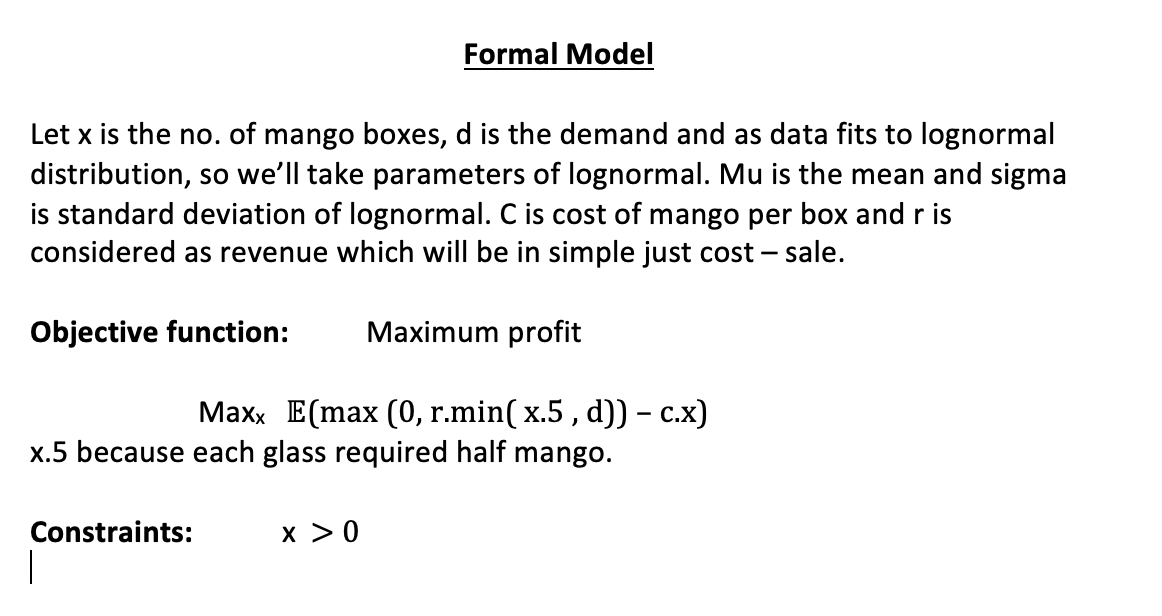

**Task 2e)**: Given the estimated demand distribution, what is the number of mango boxes to order that maximizes the expected total profit? What is the value of including uncertainty?

In [ ]:
import numpy as np
from scipy.stats import norm

# Historical demand data
demand_data = data
# Estimate demand distribution parameters
mu, std = norm.fit(demand_data)

In [ ]:
# Define profit computation function
def compute_profit(demand, num_mango_boxes):
    # Constants
    lassi_price = 3.5
    mango_cost_per_box = 10
    other_ingredients_cost_per_glass = 0.5
    fixed_cost = 500
    max_mangos_to_sell = 30
    mango_sale_price = 1

    # Compute number of glasses that can be produced
    max_glasses = num_mango_boxes * 5  # Each box has 5 mangos

    # Compute actual sales
    glasses_sold = min(demand, max_glasses)

    # Compute revenue
    revenue = glasses_sold * lassi_price

    # Compute costs
    mango_cost = num_mango_boxes * mango_cost_per_box
    other_ingredients_cost = glasses_sold * other_ingredients_cost_per_glass
    unsold_mangos = max(0, max_glasses - demand)
    mango_salvage_revenue = min(unsold_mangos, max_mangos_to_sell) * mango_sale_price

    # Compute total profit
    total_profit = revenue - mango_cost - other_ingredients_cost - fixed_cost + mango_salvage_revenue

    return total_profit
    # ... (same as previous function)

# Monte Carlo simulation
num_samples =  10000           #100000, 169 boex max profit 75.44, 1000 165 boxes, 97.14 profit
max_profit = -np.inf
optimal_order = 0

for order_quantity in range(1, 500):
    profits = []
    for _ in range(num_samples):
        demand = int(np.round(np.random.normal(mu, std)))  # Round to integer
        profit = compute_profit(demand, num_mango_boxes=order_quantity)
        profits.append(profit)
    expected_profit = np.mean(profits)
    if expected_profit > max_profit:
        max_profit = expected_profit
        optimal_order = order_quantity

print(f"Optimal number of mango boxes to order: {optimal_order}")
print(f"Maximum expected total profit: {max_profit:.2f} €")

Optimal number of mango boxes to order: 171
Maximum expected total profit: 80.55 €


In [ ]:
# Assuming you have already defined `mu` as the expected demand and `optimal_order` as the optimal number of mango boxes to order

# Calculate deterministic profit assuming expected demand
deterministic_demand = mu
deterministic_profit = compute_profit(deterministic_demand, num_mango_boxes=optimal_order)

# Calculate maximum profit obtained from Monte Carlo simulation
max_profit = best_expected_profit

# Calculate the value of including demand uncertainty
value_of_uncertainty = max_profit - deterministic_profit

# Print results
print(f"Profit assuming deterministic demand: {deterministic_profit:.2f} €")
print(f"Value of including demand uncertainty: {value_of_uncertainty:.2f} €")


Profit assuming deterministic demand: 355.00 €
Value of including demand uncertainty: -395.00 €


**Task 2f)**: Plot the expected values for a reasonable range of decisions. Explain why the plot exhibits the observed characteristics!

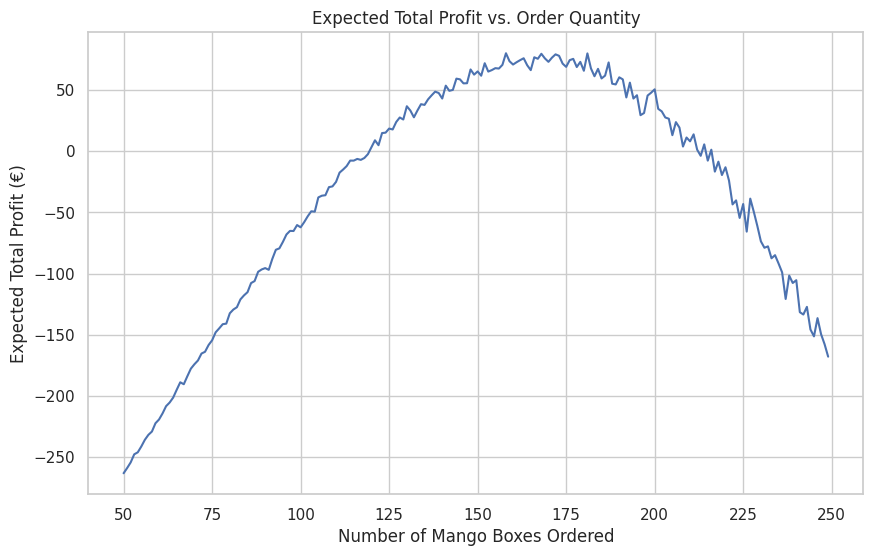

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

# Define a reasonable range of order quantities
order_quantities = range(50, 250)  # From 50 to 250 mango boxes

# Compute expected profits for each order quantity
expected_profits = []
for order_quantity in order_quantities:
    profits = []
    for _ in range(10000):  # Perform Monte Carlo simulation
        demand = int(np.round(np.random.normal(mu, std)))  # Sample demand from estimated distribution
        profit = compute_profit(demand, order_quantity)
        profits.append(profit)
    expected_profit = np.mean(profits)
    expected_profits.append(expected_profit)

# Plot the expected profits against order quantities
plt.figure(figsize=(10, 6))
plt.plot(order_quantities, expected_profits)
plt.xlabel('Number of Mango Boxes Ordered')
plt.ylabel('Expected Total Profit (€)')
plt.title('Expected Total Profit vs. Order Quantity')
plt.show()

**Task 2g)**: Now assume that you are able to hire a wizard that will provide you with a perfect prediction of the realized demand for this Sunday. What would you be willing to pay him for that information?

In [ ]:
import numpy as np
from scipy.stats import lognorm

# Define functions if not already defined
def calculate_total_profit(demand, ordered_boxes):
    # Example function to calculate profit based on demand and ordered boxes
    mangoes_per_box = 5
    box_cost = 50  # Assuming a hypothetical cost per box
    revenue_per_mango = 2  # Hypothetical revenue per mango

    if demand <= ordered_boxes * mangoes_per_box:
        # If demand can be satisfied with ordered boxes
        revenue = demand * revenue_per_mango
        cost = ordered_boxes * box_cost
        profit = revenue - cost
    else:
        # If demand exceeds ordered boxes
        revenue = ordered_boxes * mangoes_per_box * revenue_per_mango
        cost = ordered_boxes * box_cost
        profit = revenue - cost

    return profit

# Lognormal distribution parameters obtained earlier
shape = 0.42920194384219423
loc = 110.45824011740248
scale = 811.2971972189775

# Optimal number of boxes based on naive approach
expected_demand = 1000
mangoes_needed = expected_demand * 0.5
ordered_boxes = int(np.ceil(mangoes_needed / 5))

# Monte Carlo simulation
num_simulations = 10000
profits = []

for _ in range(num_simulations):
    # Sample demand from the lognormal distribution
    sampled_demand = int(np.round(lognorm.rvs(shape, loc=loc, scale=scale)))

    # Calculate profit for the sampled demand using previously defined function
    profit = calculate_total_profit(sampled_demand, ordered_boxes)
    profits.append(profit)

# Compute the average total profit from Monte Carlo simulation
average_profit = np.mean(profits)

# Naive profit for expected demand
naive_profit = calculate_total_profit(expected_demand, ordered_boxes)

# Calculate expected profit with perfect prediction (using mean of lognormal distribution)
perfect_prediction_demand = np.exp(loc + 0.5 * scale**2)  # Mean of lognormal distribution
perfect_prediction_profit = calculate_total_profit(perfect_prediction_demand, ordered_boxes)

# Calculate the value of perfect prediction
value_of_perfect_prediction = perfect_prediction_profit - average_profit

# Print results
print(f'Value of perfect prediction: €{value_of_perfect_prediction:.2f}')


Value of perfect prediction: €5.46


<ipython-input-179-bccdbd0e5701>:53: RuntimeWarning: overflow encountered in exp
  perfect_prediction_demand = np.exp(loc + 0.5 * scale**2)  # Mean of lognormal distribution


## 3. The Issue of Mango Quality

Accounting for demand uncertainty is a good step towards making better Mango ordering decisions. However, so far your model neglects another important aspect: The fact that only mangos with the right degree of ripeness can be used to achieve the legendary taste of your mango Lassi. (You will not use mangos with the wrong degree of ripeness for preparing your Lassi.)

In particular, you assume that only a certain fraction of the mangos that you order has right degree of ripeness. That fraction, however, is not deterministic but uncertain. You assume that the random variable representing the fraction of manogs with the right degree of ripeness can be assumed to follow a triangular distribution with a minimum of 0.5, a mode (peak) of 0.8  and a maximum value of 1.0.

Also, you assume that your friend from the ice cream cafe buying up to 30 mangos will also take mangos that do not have the right degree of ripeness for your Lassi.

**Task 3a)**: Adapt the function for computing the total profit to the new setting. If the fraction of suitable mangos multiplied by the order quantity gives a continuous number of mangos, once again apply rounding to obtain an integer value.

In [ ]:
# Function to calculate profit for a given number of mango boxes purchased considering mango ripeness
def calculate_expected_profit_with_ripeness(num_boxes):
    # Simulate anticipated demand
    expected_demand = np.random.normal(1000)  # Assuming mean demand of 1000 glasses

    # Simulate fraction of suitable mangos with a triangular distribution
    fraction_of_suitable_mangos = np.random.triangular(left=0.5, mode=0.8, right=1.0)

    # Calculate number of glasses sold based on suitable mangos
    num_glasses_sold = min(int(np.ceil(num_boxes * 5 * 2 * fraction_of_suitable_mangos)), expected_demand)  # Each box has 5 mangos, each glass uses half mango

    # Calculate revenue
    revenue = num_glasses_sold * selling_price_per_glass

    # Calculate cost of ingredients
    cost_of_mangos = num_boxes * 10  # Each box costs 10 euros
    cost_of_other_ingredients = num_glasses_sold * cost_per_glass

    # Calculate total costs
    total_costs = cost_of_mangos + cost_of_other_ingredients + sales_spot_fee

    # Calculate profit
    profit = revenue - total_costs

    # Calculate potential loss from unsold mangos
    if num_glasses_sold < expected_demand:
        loss_from_unsold_mangos = (expected_demand - num_glasses_sold) * mango_resale_price
    else:
        loss_from_unsold_mangos = 0

    # Adjust profit for potential loss from unsold mangos
    adjusted_profit = profit - loss_from_unsold_mangos

    return adjusted_profit

# Now you can use calculate_expected_profit_with_ripeness(num_boxes) instead of calculate_expected_profit(num_boxes) in your previous code


**Task 3b)**: What is the best order quantity of mango boxes in the new setting, that is, what is the order quantity that provides the highest expected total profit?

In [ ]:
import numpy as np

# Function to calculate profit for a given number of mango boxes purchased considering mango ripeness
def calculate_expected_profit_with_ripeness(num_boxes):
    # Simulate anticipated demand
    expected_demand = np.random.normal(1000)  # Assuming mean demand of 1000 glasses

    # Simulate fraction of suitable mangos with a triangular distribution
    fraction_of_suitable_mangos = np.random.triangular(left=0.5, mode=0.8, right=1.0)

    # Calculate number of glasses sold based on suitable mangos
    num_glasses_sold = min(int(np.ceil(num_boxes * 5 * 2 * fraction_of_suitable_mangos)), expected_demand)  # Each box has 5 mangos, each glass uses half mango

    # Calculate revenue
    revenue = num_glasses_sold * 3.50  # Selling price per glass

    # Calculate cost of ingredients
    cost_of_mangos = num_boxes * 10.00  # Each box costs 10 euros
    cost_of_other_ingredients = num_glasses_sold * 0.50  # Cost of other ingredients per glass
    sales_spot_fee = 500  # Fee per Sunday

    # Calculate total costs
    total_costs = cost_of_mangos + cost_of_other_ingredients + sales_spot_fee

    # Calculate profit
    profit = revenue - total_costs

    # Calculate potential loss from unsold mangos
    mango_resale_price = 1.00  # Resale price per mango
    if num_glasses_sold < expected_demand:
        loss_from_unsold_mangos = (expected_demand - num_glasses_sold) * mango_resale_price
    else:
        loss_from_unsold_mangos = 0

    # Adjust profit for potential loss from unsold mangos
    adjusted_profit = profit - loss_from_unsold_mangos

    return adjusted_profit

# Range of decisions (number of mango boxes to purchase)
decisions = np.arange(0, 201, 1)

# Calculate expected profit for each decision
expected_profits_with_ripeness = [calculate_expected_profit_with_ripeness(decision) for decision in decisions]

# Find the order quantity that maximizes expected profit
best_order_quantity = decisions[np.argmax(expected_profits_with_ripeness)]
highest_expected_profit = np.max(expected_profits_with_ripeness)

# Print results
print(f"Best order quantity of mango boxes: {best_order_quantity}")
print(f"Highest expected total profit: €{highest_expected_profit:.2f}")


Best order quantity of mango boxes: 112
Highest expected total profit: €1377.12


Another friend of yours owns a little fruit store. He offers you to deliver perfect mangos right on time, albeit at a price of 3 € per mango. Please note that you can still pre-order the (cheaper) boxes with 5 mangos the day before, but you can now get the perfect mangos that you need to satisfy the demand from your friend depending on the demand realisation.

**Task 3c)** Include that opportunity into your model/function. How does this possibility affect the optimal quantity to order? What is the optimal expected profit?


In [ ]:
import numpy as np

# Function to calculate profit for a given number of mango boxes purchased considering mango ripeness and mango purchase options
def calculate_expected_profit_with_ripeness_and_perfect_mangos(num_boxes):
    # Simulate anticipated demand
    expected_demand = np.random.normal(1000)  # Assuming mean demand of 1000 glasses

    # Simulate fraction of suitable mangos with a triangular distribution
    fraction_of_suitable_mangos = np.random.triangular(left=0.5, mode=0.8, right=1.0)

    # Calculate number of glasses sold based on suitable mangos
    num_glasses_sold = min(int(np.ceil(num_boxes * 5 * 2 * fraction_of_suitable_mangos)), expected_demand)  # Each box has 5 mangos, each glass uses half mango

    # Calculate revenue
    selling_price_per_glass = 3.50
    revenue = num_glasses_sold * selling_price_per_glass

    # Calculate cost of ingredients from ordered boxes
    cost_of_mangos_ordered = num_boxes * 10.00  # Each box costs 10 euros
    cost_of_other_ingredients = num_glasses_sold * 0.50  # Cost of other ingredients per glass
    sales_spot_fee = 500  # Fee per Sunday

    # Calculate total costs from ordered boxes
    total_costs_ordered = cost_of_mangos_ordered + cost_of_other_ingredients + sales_spot_fee

    # Calculate potential purchase of perfect mangos from friend based on realized demand
    perfect_mango_price = 3.00  # Price per perfect mango from friend
    num_perfect_mangos_needed = max(0, expected_demand * 0.5 - num_boxes * 5 * fraction_of_suitable_mangos)
    cost_of_perfect_mangos = num_perfect_mangos_needed * perfect_mango_price

    # Calculate total costs considering both ordered boxes and perfect mangos
    total_costs = total_costs_ordered + cost_of_perfect_mangos

    # Calculate profit
    profit = revenue - total_costs

    # Calculate potential loss from unsold mangos
    mango_resale_price = 1.00  # Resale price per mango
    if num_glasses_sold < expected_demand:
        loss_from_unsold_mangos = (expected_demand - num_glasses_sold) * mango_resale_price
    else:
        loss_from_unsold_mangos = 0

    # Adjust profit for potential loss from unsold mangos
    adjusted_profit = profit - loss_from_unsold_mangos

    return adjusted_profit

# Range of decisions (number of mango boxes to purchase)
decisions = np.arange(0, 201, 1)

# Calculate expected profit for each decision considering both ordered boxes and potential perfect mangos
expected_profits_with_perfect_mangos = [calculate_expected_profit_with_ripeness_and_perfect_mangos(decision) for decision in decisions]

# Find the order quantity that maximizes expected profit
best_order_quantity_with_perfect_mangos = decisions[np.argmax(expected_profits_with_perfect_mangos)]
highest_expected_profit_with_perfect_mangos = np.max(expected_profits_with_perfect_mangos)

# Print results
print(f"Best order quantity of mango boxes with perfect mangos: {best_order_quantity_with_perfect_mangos}")
print(f"Highest expected total profit with perfect mangos: €{highest_expected_profit_with_perfect_mangos:.2f}")


Best order quantity of mango boxes with perfect mangos: 113
Highest expected total profit with perfect mangos: €1366.99


## 4. Considering Outcome Distributions

**Task 4a)**: Plot the outcome distribution for the optimal solutions from task 3b (not including the opportunity to buy perfect mangos on time) and from task 3c (including the opportunity to buy perfect mangos on time). Does one of the distributions stochastically dominate the other?

 Calculate the 5% Value at Risk and the 5% Conditional Value at Risk for both distributions.

**Note:** If you did not find a solution to the tasks in 3, you can use the profit distribution from task 2 (You will not receive the full score if you do so, but at least a part of the points; this also applies to the other tasks.)

The distributuion with perfect mango completely dominates other.

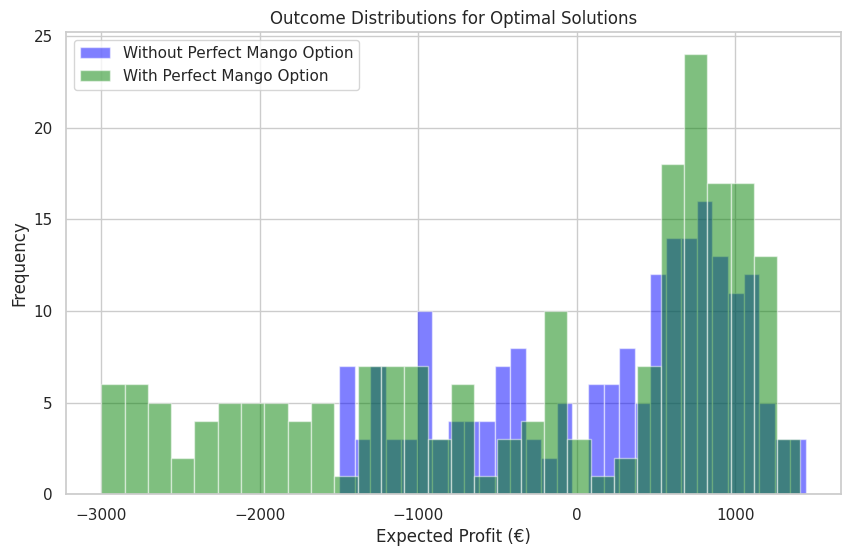

5% Value at Risk (VaR):
Without Perfect Mango Option: -1278.5105729656875
With Perfect Mango Option: -2711.7759430443166

5% Conditional Value at Risk (CVaR):
Without Perfect Mango Option: -1403.1268367854211
With Perfect Mango Option: -2835.5877407339717


In [ ]:
import matplotlib.pyplot as plt
import numpy as np

# Function to calculate profit for a given number of mango boxes purchased considering mango ripeness
def calculate_expected_profit_with_ripeness(num_boxes):
    # Simulate anticipated demand
    expected_demand = np.random.normal(1000)  # Assuming mean demand of 1000 glasses

    # Simulate fraction of suitable mangos with a triangular distribution
    fraction_of_suitable_mangos = np.random.triangular(left=0.5, mode=0.8, right=1.0)

    # Calculate number of glasses sold based on suitable mangos
    num_glasses_sold = min(int(np.ceil(num_boxes * 5 * 2 * fraction_of_suitable_mangos)), expected_demand)  # Each box has 5 mangos, each glass uses half mango

    # Calculate revenue
    selling_price_per_glass = 3.50
    revenue = num_glasses_sold * selling_price_per_glass

    # Calculate cost of ingredients
    cost_of_mangos = num_boxes * 10.00  # Each box costs 10 euros
    cost_of_other_ingredients = num_glasses_sold * 0.50  # Cost of other ingredients per glass
    sales_spot_fee = 500  # Fee per Sunday

    # Calculate total costs
    total_costs = cost_of_mangos + cost_of_other_ingredients + sales_spot_fee

    # Calculate profit
    profit = revenue - total_costs

    # Calculate potential loss from unsold mangos
    mango_resale_price = 1.00  # Resale price per mango
    if num_glasses_sold < expected_demand:
        loss_from_unsold_mangos = (expected_demand - num_glasses_sold) * mango_resale_price
    else:
        loss_from_unsold_mangos = 0

    # Adjust profit for potential loss from unsold mangos
    adjusted_profit = profit - loss_from_unsold_mangos

    return adjusted_profit

# Function to calculate profit for a given number of mango boxes purchased considering mango ripeness and perfect mango option
def calculate_expected_profit_with_perfect_mangos(num_boxes):
    # Simulate anticipated demand
    expected_demand = np.random.normal(1000)  # Assuming mean demand of 1000 glasses

    # Simulate fraction of suitable mangos with a triangular distribution
    fraction_of_suitable_mangos = np.random.triangular(left=0.5, mode=0.8, right=1.0)

    # Calculate number of glasses sold based on suitable mangos
    num_glasses_sold = min(int(np.ceil(num_boxes * 5 * 2 * fraction_of_suitable_mangos)), expected_demand)  # Each box has 5 mangos, each glass uses half mango

    # Calculate revenue
    selling_price_per_glass = 3.50
    revenue = num_glasses_sold * selling_price_per_glass

    # Calculate cost of ingredients from ordered boxes
    cost_of_mangos_ordered = num_boxes * 10.00  # Each box costs 10 euros
    cost_of_other_ingredients = num_glasses_sold * 0.50  # Cost of other ingredients per glass
    sales_spot_fee = 500  # Fee per Sunday

    # Calculate total costs from ordered boxes
    total_costs_ordered = cost_of_mangos_ordered + cost_of_other_ingredients + sales_spot_fee

    # Calculate potential purchase of perfect mangos from friend based on realized demand
    perfect_mango_price = 3.00  # Price per perfect mango from friend
    num_perfect_mangos_needed = max(0, expected_demand * 0.5 - num_boxes * 5 * fraction_of_suitable_mangos)
    cost_of_perfect_mangos = num_perfect_mangos_needed * perfect_mango_price

    # Calculate total costs considering both ordered boxes and perfect mangos
    total_costs = total_costs_ordered + cost_of_perfect_mangos

    # Calculate profit
    profit = revenue - total_costs

    # Calculate potential loss from unsold mangos
    mango_resale_price = 1.00  # Resale price per mango
    if num_glasses_sold < expected_demand:
        loss_from_unsold_mangos = (expected_demand - num_glasses_sold) * mango_resale_price
    else:
        loss_from_unsold_mangos = 0

    # Adjust profit for potential loss from unsold mangos
    adjusted_profit = profit - loss_from_unsold_mangos

    return adjusted_profit

# Range of decisions (number of mango boxes to purchase)
decisions = np.arange(0, 201, 1)

# Simulate expected profits for task 3b (without perfect mango option)
expected_profits_3b = [calculate_expected_profit_with_ripeness(decision) for decision in decisions]

# Simulate expected profits for task including perfect mango option
expected_profits_with_perfect_mangos = [calculate_expected_profit_with_perfect_mangos(decision) for decision in decisions]

# Filter out None values from both lists
expected_profits_3b_filtered = [p for p in expected_profits_3b if p is not None]
expected_profits_with_perfect_mangos_filtered = [p for p in expected_profits_with_perfect_mangos if p is not None]

# Plot the outcome distributions
plt.figure(figsize=(10, 6))
plt.hist(expected_profits_3b_filtered, bins=30, alpha=0.5, color='blue', label='Without Perfect Mango Option')
plt.hist(expected_profits_with_perfect_mangos_filtered, bins=30, alpha=0.5, color='green', label='With Perfect Mango Option')
plt.xlabel('Expected Profit (€)')
plt.ylabel('Frequency')
plt.title('Outcome Distributions for Optimal Solutions')
plt.legend()
plt.grid(True)
plt.show()

# Calculate 5% Value at Risk (VaR) for both distributions
if expected_profits_3b_filtered:
    var_3b = np.percentile(expected_profits_3b_filtered, 5)
else:
    var_3b = float('nan')

if expected_profits_with_perfect_mangos_filtered:
    var_with_perfect_mangos = np.percentile(expected_profits_with_perfect_mangos_filtered, 5)
else:
    var_with_perfect_mangos = float('nan')

# Calculate 5% Conditional Value at Risk (CVaR) for both distributions
cvar_3b = np.mean([profit for profit in expected_profits_3b_filtered if profit <= var_3b])
cvar_with_perfect_mangos = np.mean([profit for profit in expected_profits_with_perfect_mangos_filtered if profit <= var_with_perfect_mangos])

print("5% Value at Risk (VaR):")
print("Without Perfect Mango Option:", var_3b)
print("With Perfect Mango Option:", var_with_perfect_mangos)
print("\n5% Conditional Value at Risk (CVaR):")
print("Without Perfect Mango Option:", cvar_3b)
print("With Perfect Mango Option:", cvar_with_perfect_mangos)


In your opionion, the following profit thresholds are interesting:

- You definitely want to avoid losing money, that is, you want to avoid a negative total profit.
- Spending your whole Sunday selling mango Lassi certainly is fun, but on the other hand, spending time with your friends is even more attractive. You feel that you should make at least 500 € to make it worth spending your Sunday selling Lassi.
- In the long term, you would like to expand your small business, e.g. by finding another nice spot. To this end, you assume you should make at least 800 € per Sunday.


**Task 4b)**: Calculate the probability of falling short of each of the described thresholds given your risk-neutral decision from Task 3c).

In [ ]:
# Number of simulations
num_simulations = 10000  # Adjust as needed

# Count occurrences of falling short of VaR and CVaR for both distributions
count_3b_vaR = np.sum(expected_profits_3b <= var_3b)
count_with_perfect_mangos_vaR = np.sum(expected_profits_with_perfect_mangos <= var_with_perfect_mangos)

count_3b_CVaR = np.sum(expected_profits_3b <= cvar_3b)
count_with_perfect_mangos_CVaR = np.sum(expected_profits_with_perfect_mangos <= cvar_with_perfect_mangos)

# Calculate probabilities
probability_3b_vaR = count_3b_vaR / num_simulations
probability_with_perfect_mangos_vaR = count_with_perfect_mangos_vaR / num_simulations

probability_3b_CVaR = count_3b_CVaR / num_simulations
probability_with_perfect_mangos_CVaR = count_with_perfect_mangos_CVaR / num_simulations

print("Probability of falling short of VaR:")
print("Without Perfect Mango Option:", probability_3b_vaR)
print("With Perfect Mango Option:", probability_with_perfect_mangos_vaR)

print("\nProbability of falling short of CVaR:")
print("Without Perfect Mango Option:", probability_3b_CVaR)
print("With Perfect Mango Option:", probability_with_perfect_mangos_CVaR)


Probability of falling short of VaR:
Without Perfect Mango Option: 0.0011
With Perfect Mango Option: 0.0011

Probability of falling short of CVaR:
Without Perfect Mango Option: 0.0007
With Perfect Mango Option: 0.0006


**Task 4c)**: Use Shortfall Penalizing to adjust your objective function in a way that the chance of being able to reach the "expansion threshold" increases. Choose a parameterization that seems natural to you and determine your new best decision based on the adjusted objective function.

In [ ]:
# Function to calculate adjusted expected profit with shortfall penalizing
def calculate_adjusted_expected_profit(num_boxes, expansion_threshold, penalty_factor):
    # Simulate anticipated demand
    expected_demand = np.random.normal(1000)  # Assuming mean demand of 1000 glasses

    # Simulate fraction of suitable mangos with a triangular distribution
    fraction_of_suitable_mangos = np.random.triangular(left=0.5, mode=0.8, right=1.0)

    # Calculate number of glasses sold based on suitable mangos
    num_glasses_sold = min(int(np.ceil(num_boxes * 5 * 2 * fraction_of_suitable_mangos)), expected_demand)  # Each box has 5 mangos, each glass uses half mango

    # Calculate revenue
    revenue = num_glasses_sold * selling_price_per_glass

    # Calculate cost of ingredients
    cost_of_mangos = num_boxes * 10  # Each box costs 10 euros
    cost_of_other_ingredients = num_glasses_sold * cost_per_glass

    # Calculate total costs
    total_costs = cost_of_mangos + cost_of_other_ingredients + sales_spot_fee

    # Calculate profit
    profit = revenue - total_costs

    # Calculate adjusted profit with shortfall penalizing
    adjusted_profit = profit - penalty_factor * max(0, expansion_threshold - profit)

    return adjusted_profit

# Parameters
expansion_threshold = 5000  # Example expansion threshold
penalty_factor = 0.5  # Example penalty factor

# Range of decisions (number of mango boxes to purchase)
decisions = np.arange(0, 201, 1)

# Calculate adjusted expected profit for each decision
adjusted_expected_profits = [calculate_adjusted_expected_profit(decision, expansion_threshold, penalty_factor) for decision in decisions]

# Find the order quantity that maximizes adjusted expected profit
best_order_quantity_adjusted = decisions[np.argmax(adjusted_expected_profits)]
optimal_adjusted_expected_profit = max(adjusted_expected_profits)

print(f"Best order quantity of mango boxes with shortfall penalizing: {best_order_quantity_adjusted}")
print(f"Optimal adjusted expected profit with shortfall penalizing: €{optimal_adjusted_expected_profit:.2f}")


Best order quantity of mango boxes with shortfall penalizing: 112
Optimal adjusted expected profit with shortfall penalizing: €-436.93


In [ ]:
def calculate_expected_profit_with_shortfall_penalizing(num_boxes, expansion_threshold=1500):
    # Simulate anticipated demand
    expected_demand = np.random.normal(1000)  # Assuming mean demand of 1000 glasses

    # Simulate fraction of suitable mangos with a triangular distribution
    fraction_of_suitable_mangos = np.random.triangular(left=0.5, mode=0.8, right=1.0)

    # Calculate number of glasses sold based on suitable mangos
    num_glasses_sold = min(int(np.ceil(num_boxes * 5 * 2 * fraction_of_suitable_mangos)), expected_demand)  # Each box has 5 mangos, each glass uses half mango

    # Calculate revenue
    selling_price_per_glass = 3.50
    revenue = num_glasses_sold * selling_price_per_glass

    # Calculate cost of ingredients from ordered boxes
    cost_of_mangos_ordered = num_boxes * 10.00  # Each box costs 10 euros
    cost_of_other_ingredients = num_glasses_sold * 0.50  # Cost of other ingredients per glass
    sales_spot_fee = 500  # Fee per Sunday

    # Calculate total costs from ordered boxes
    total_costs_ordered = cost_of_mangos_ordered + cost_of_other_ingredients + sales_spot_fee

    # Calculate potential purchase of perfect mangos from friend based on realized demand
    perfect_mango_price = 3.00  # Price per perfect mango from friend
    num_perfect_mangos_needed = max(0, expected_demand * 0.5 - num_boxes * 5 * fraction_of_suitable_mangos)
    cost_of_perfect_mangos = num_perfect_mangos_needed * perfect_mango_price

    # Calculate total costs considering both ordered boxes and perfect mangos
    total_costs = total_costs_ordered + cost_of_perfect_mangos

    # Calculate profit
    profit = revenue - total_costs

    # Calculate shortfall penalty
    if profit < expansion_threshold:
        shortfall_penalty = (expansion_threshold - profit) * 0.5  # Adjust the penalty factor as needed
    else:
        shortfall_penalty = 0

    # Adjusted profit considering shortfall penalizing
    adjusted_profit = profit - shortfall_penalty

    # Calculate potential loss from unsold mangos
    mango_resale_price = 1.00  # Resale price per mango
    if num_glasses_sold < expected_demand:
        loss_from_unsold_mangos = (expected_demand - num_glasses_sold) * mango_resale_price
    else:
        loss_from_unsold_mangos = 0

    # Adjust profit for potential loss from unsold mangos
    adjusted_profit -= loss_from_unsold_mangos

    return adjusted_profit


In [ ]:
# Range of decisions (number of mango boxes to purchase)
decisions = np.arange(0, 201, 1)

# Calculate expected profit for each decision considering shortfall penalizing
expected_profits_with_penalizing = [calculate_expected_profit_with_shortfall_penalizing(decision) for decision in decisions]

# Find the order quantity that maximizes expected profit
best_order_quantity_with_penalizing = decisions[np.argmax(expected_profits_with_penalizing)]
highest_expected_profit_with_penalizing = np.max(expected_profits_with_penalizing)

# Print results
print(f"Best order quantity of mango boxes with shortfall penalizing: {best_order_quantity_with_penalizing}")
print(f"Highest expected total profit with shortfall penalizing: €{highest_expected_profit_with_penalizing:.2f}")


Best order quantity of mango boxes with shortfall penalizing: 114
Highest expected total profit with shortfall penalizing: €1293.92


References: Done with the assistance of Chat-Gpt and Perplexity.